# Dealing with Outliers

An outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Even if a data point is an outlier, its still a data point. Carefully considering our data, its sources, and our goals whenever deciding to remove an outlier is important. Each case is different.

## Goals
* Understand different mathmatical definitions of outliers
* Use Python tools to recognize outliers and remove them


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

There are many ways to identify and remove outliers:
* Trimming based off a provided value
* Capping based off IQR or STD

## Ames Data Set

Exploring any extreme outliers in our Ames Housing Data Set

In [2]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
corr_cols = []
for i in df.columns:
    if df[i].dtype != 'object':
        corr_cols.append(i)
corr_cols

['PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

<Axes: >

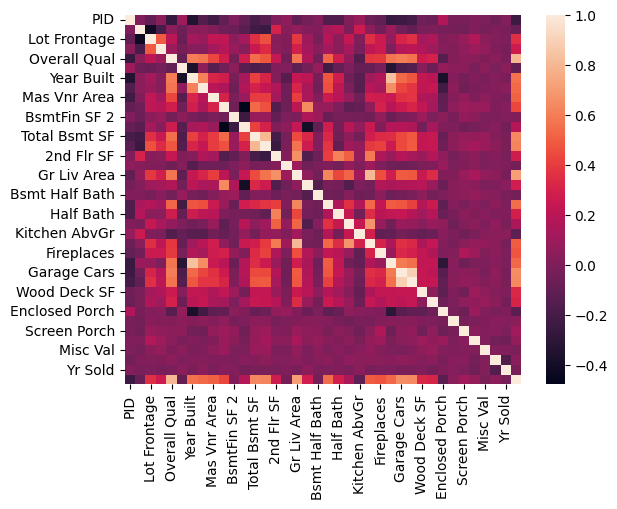

In [12]:
# fig, ax = plt.subplots(figsize = (20,14), dpi=250)
sns.heatmap(df[corr_cols].corr())

In [14]:
df[corr_cols].corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='SalePrice', ylabel='Count'>

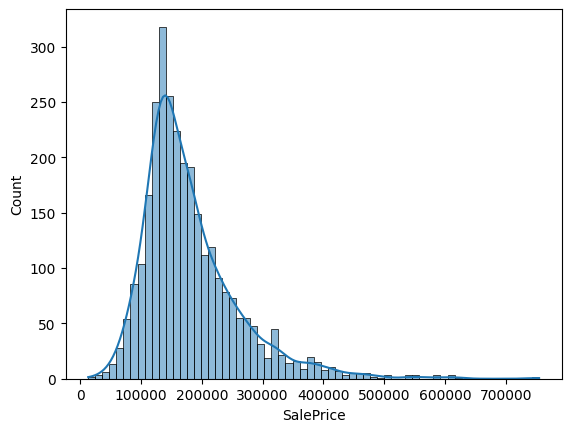

In [17]:
sns.histplot(df["SalePrice"], kde=True)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

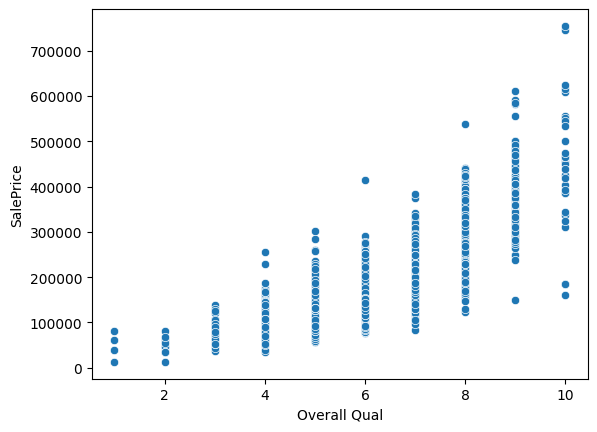

In [19]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [20]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

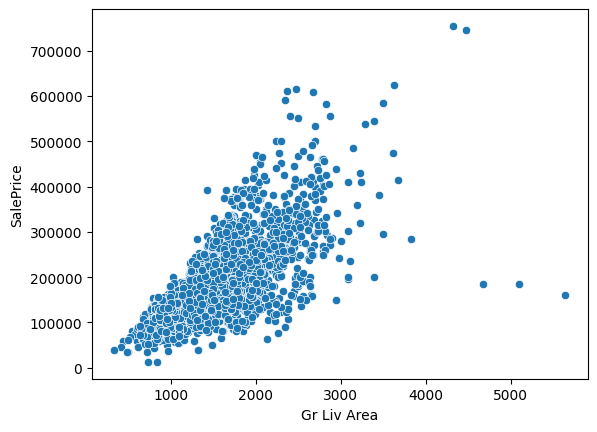

In [21]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

In [22]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [23]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

Index([1498, 2180, 2181], dtype='int64')

In [24]:
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index

In [25]:
df = df.drop(ind_drop,axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

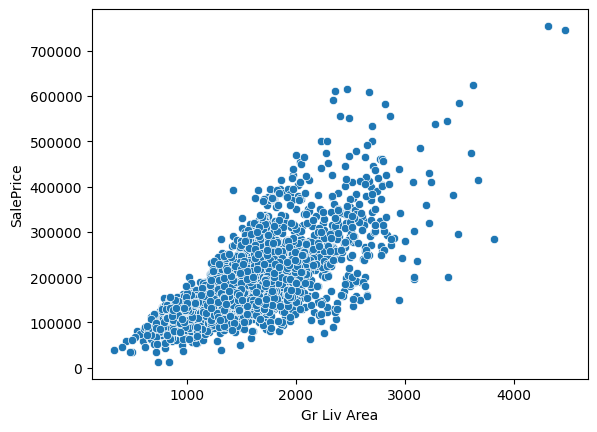

In [26]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=df)

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

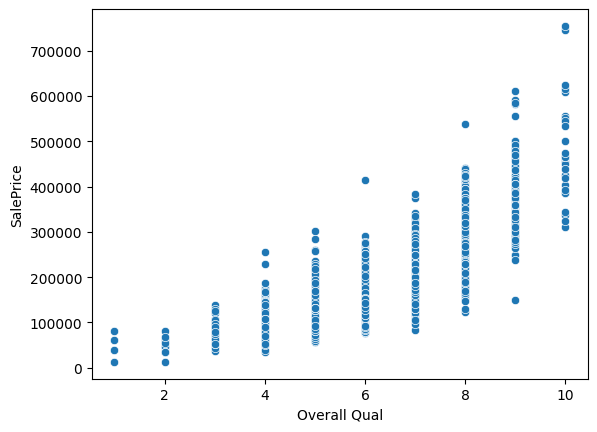

In [27]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data=df)

In [28]:
df.to_csv("../DATA/Ames_outliers_removed.csv",index=False)

# Dealing with Missing Data

There is no 100% correct way of dealing with missing data, and in this section of the notebook we take some reasonable approaches to take on this data.

#### Note: Throughout this section we slowly clean and add features to the Ames Housing Dataset to further use it for modeling. 

In [ ]:
### Basically meta data to describe variables/ features in the dataset 
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data


In [31]:
df = pd.read_csv("../DATA/Ames_outliers_removed.csv")

In [32]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [33]:
len(df.columns)

81

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

### Removing the PID

We already have an index, so atleast in this case, we don't need the PID unique identifier for the regression we will perform later on. Another way would be to simply set PID unique identifier as the index.

In [35]:
df = df.drop('PID',axis=1)

In [36]:
len(df.columns)

80

## Observing NaN Features

In [37]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [38]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [ ]:
100* df.isnull().sum() / len(df) ### finding the percentages of missing cases from features

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [40]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [41]:
percent_nan = percent_missing(df)

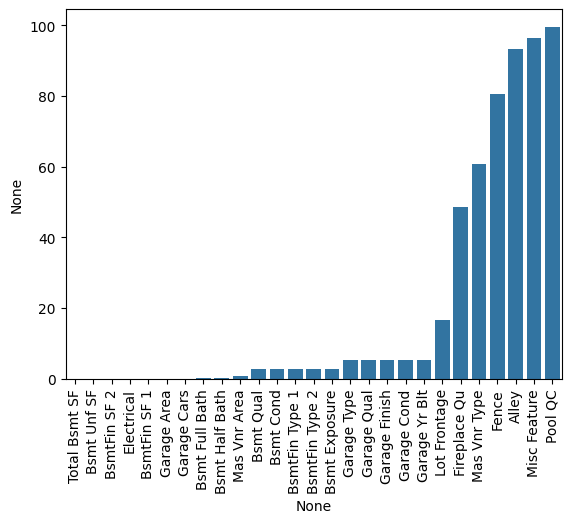

In [42]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

## Example of Filling in Data : Basement Columns

(0.0, 1.0)

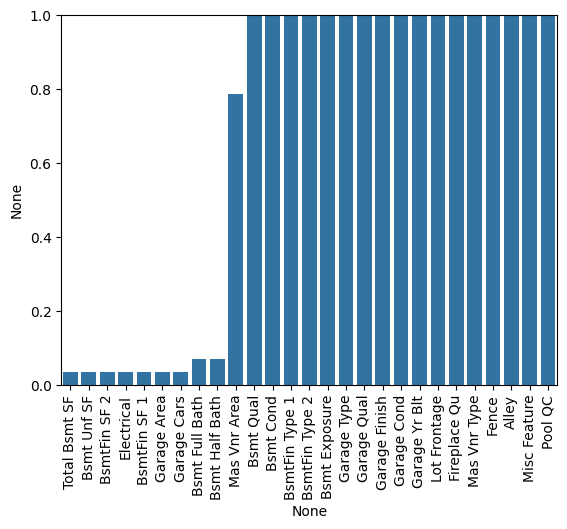

In [43]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it. Watch the video for a full explanation of this, in reality it probably makes more sense to fill in the Missing Basement data since its well described in the text description.

In [44]:
# Could also imply we should ex
percent_nan[percent_nan < 1]

Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [45]:
100/len(df)

0.0341646737273659

In [46]:
df[df['Total Bsmt SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [47]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

In [48]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [49]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [50]:
percent_nan = percent_missing(df)

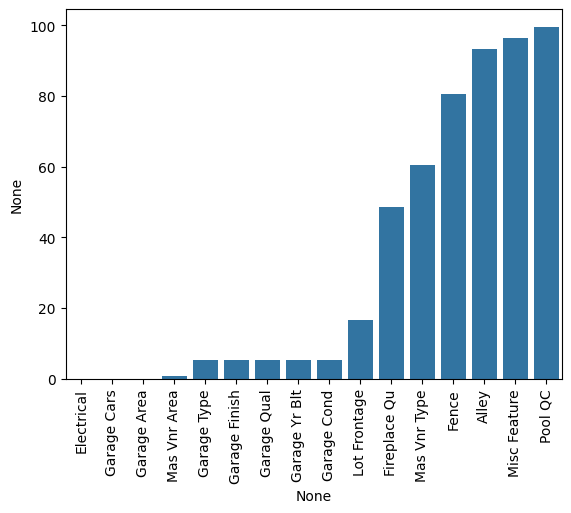

In [51]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [52]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [53]:
percent_nan = percent_missing(df)

(0.0, 1.0)

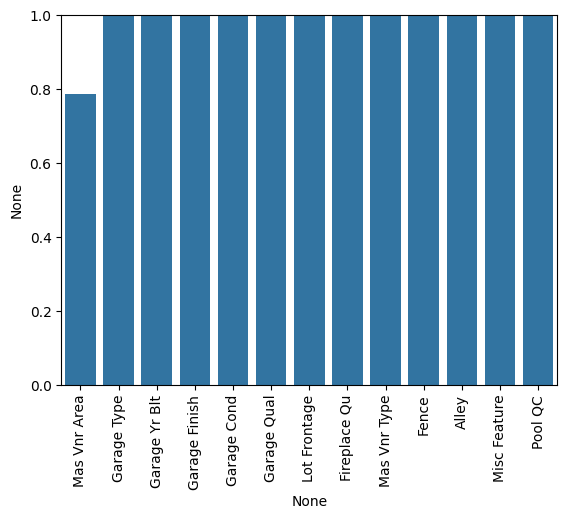

In [54]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [55]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [56]:
percent_nan = percent_missing(df)

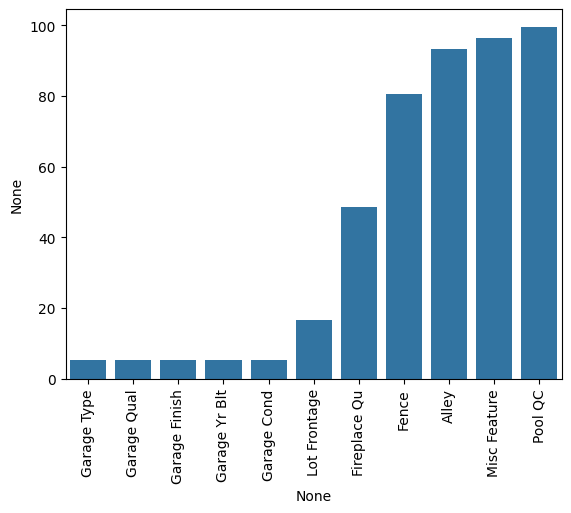

In [57]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [58]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [59]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [60]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [61]:
percent_nan = percent_missing(df)

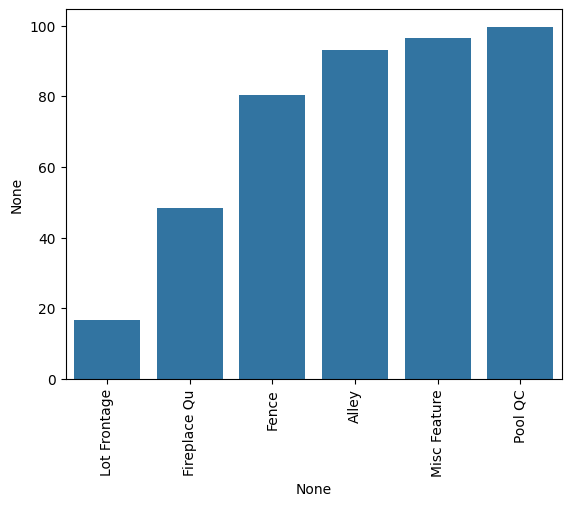

In [62]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [63]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [64]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [65]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [66]:
percent_nan = percent_missing(df)

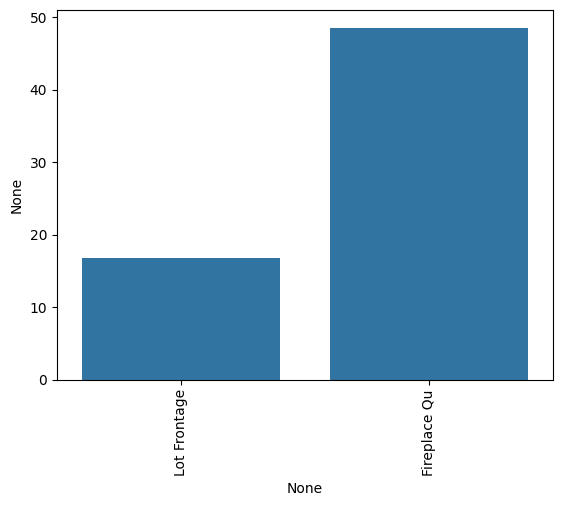

In [67]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Filling in Fireplace Quality based on Description Text

In [68]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [69]:
percent_nan = percent_missing(df)

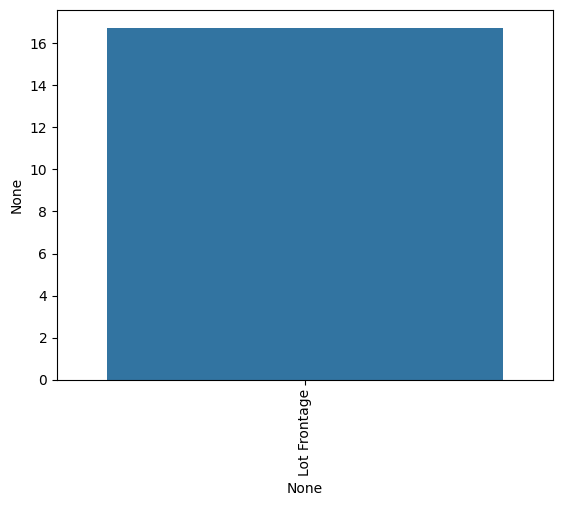

In [70]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [71]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

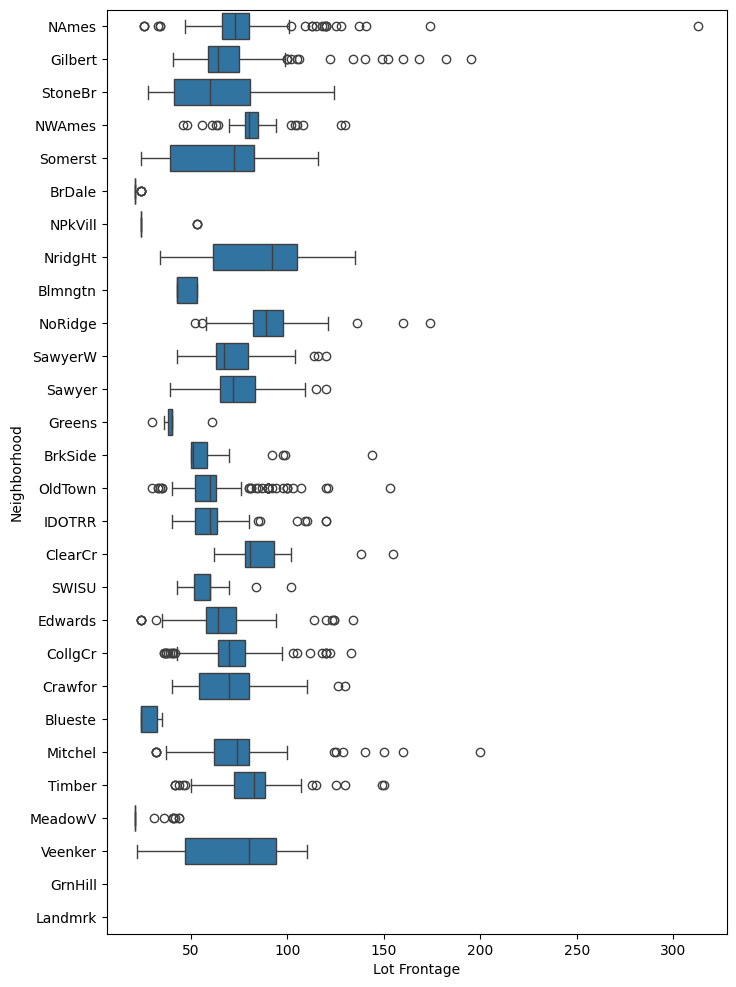

In [72]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [73]:
df.groupby('Neighborhood')['Lot Frontage']

In [74]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

## Transform Column

In [75]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [76]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [77]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [78]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [79]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [80]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [81]:
percent_nan = percent_missing(df)

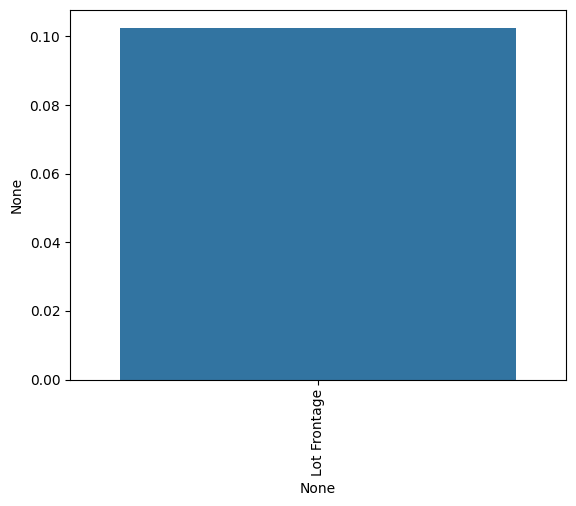

In [82]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [83]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [84]:
percent_nan = percent_missing(df)

In [85]:
percent_nan

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [86]:
df.to_csv("../DATA/Ames_NO_Missing_Data.csv",index=False)

# Dealing with Categorical Data

Many machine learning models can not deal with categorical data set as strings. For example linear regression can not apply a a Beta Coefficent to colors like "red" or "blue". Instead we need to convert these categories into "dummy" variables, otherwise known as "one-hot" encoding.

## Data

We will open the .csv file that has been "cleaned" to remove outliers and missings in the previous sections.

In [87]:
df = pd.read_csv("../DATA/Ames_NO_Missing_Data.csv")

In [88]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


## Data Description

In [89]:
# with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
#     print(f.read())

## Numerical Column to Categorical

We need to be careful when it comes to encoding categories as numbers. We want to make sure that the numerical relationship makes sense for a model. For example, the encoding MSSubClass is essentially just a number code per class:

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

The number itself does not appear to have a relationship to the other numbers. While 30 > 20 is True, it doesn't really make sense that "1-STORY 1945 & OLDER" > "1-STORY 1946 & NEWER ALL STYLES". Keep in mind, this isn't always the case, for example 1st class seats versus 2nd class seats encoded as 1 and 2. Make sure you fully understand your data set to examine what needs to be converted/changed.

### MSSubClass

In [90]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)

## Creating Dummy Variables from Object Columns

In [91]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal
2921,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal
2922,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,WD,Normal
2923,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [92]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [93]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2925 non-null   float64
 1   Lot Area         2925 non-null   int64  
 2   Overall Qual     2925 non-null   int64  
 3   Overall Cond     2925 non-null   int64  
 4   Year Built       2925 non-null   int64  
 5   Year Remod/Add   2925 non-null   int64  
 6   Mas Vnr Area     2925 non-null   float64
 7   BsmtFin SF 1     2925 non-null   float64
 8   BsmtFin SF 2     2925 non-null   float64
 9   Bsmt Unf SF      2925 non-null   float64
 10  Total Bsmt SF    2925 non-null   float64
 11  1st Flr SF       2925 non-null   int64  
 12  2nd Flr SF       2925 non-null   int64  
 13  Low Qual Fin SF  2925 non-null   int64  
 14  Gr Liv Area      2925 non-null   int64  
 15  Bsmt Full Bath   2925 non-null   float64
 16  Bsmt Half Bath   2925 non-null   float64
 17  Full Bath     

In [94]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    1152 non-null   object
 18  Exter Qu

### Converting

In [95]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [96]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [97]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2921,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2922,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2923,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


In [98]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA        -0.591459
Kitchen Qual_TA      -0.527461
Bsmt Qual_TA         -0.453022
Garage Finish_Unf    -0.422363
Garage Type_Detchd   -0.365209
                        ...   
Garage Cars           0.648488
Total Bsmt SF         0.660983
Gr Liv Area           0.727279
Overall Qual          0.802637
SalePrice             1.000000
Name: SalePrice, Length: 263, dtype: float64

    OverallQual: Rates the overall material and finish of the house

           10	Very Excellent
           9	Excellent
           8	Very Good
           7	Good
           6	Above Average
           5	Average
           4	Below Average
           3	Fair
           2	Poor
           1	Very Poor

Most likely a human realtor rated this "Overall Qual" column, which means it highly likely takes into account many of the other features. It also means that any future house we intend to predict a price for will need this "Overall Qual" feature, which implies that every new house on the market that will be priced with our ML model will still require a human person!

### Save Final DF

In [99]:
final_df.to_csv('../DATA/AMES_Final_DF.csv')